## Questionário 2
### Análise exploratória

### Questão 1
#### Leitura de Dados


In [261]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [262]:

url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"
# Read the table from the URL into a dataframe
df = pd.read_html(url)[0]

df

,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,NaN,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,NaN,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,NaN,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,NaN,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,NaN,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,NaN,Zimbabwe,Africa,2004,Developing,44.3,723,27,4.36,0.000000,...,67.0,7.13,65,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2457,NaN,Zimbabwe,Africa,2003,Developing,44.5,715,26,4.06,0.000000,...,7.0,6.52,68,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2458,NaN,Zimbabwe,Africa,2002,Developing,44.8,73,25,4.43,0.000000,...,73.0,6.53,71,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2459,NaN,Zimbabwe,Africa,2001,Developing,45.3,686,25,1.72,0.000000,...,76.0,6.16,75,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


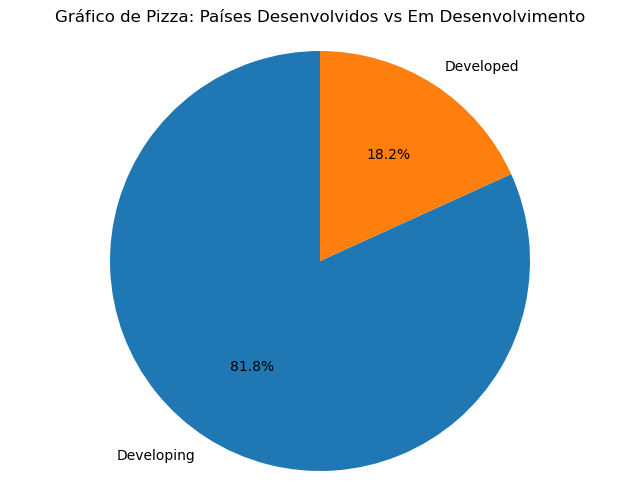

In [263]:
status_counts = df['Status'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gráfico de Pizza: Países Desenvolvidos vs Em Desenvolvimento')
plt.axis('equal')
plt.show()

#### A porcentagem é de 18.2.

### Questão 2
#####  Considerando a base anterior, construa um histograma para a variável Life_expectancy. Qual a média e variância desse atributo? 

Sabemos que a expectativa de vida é em anos

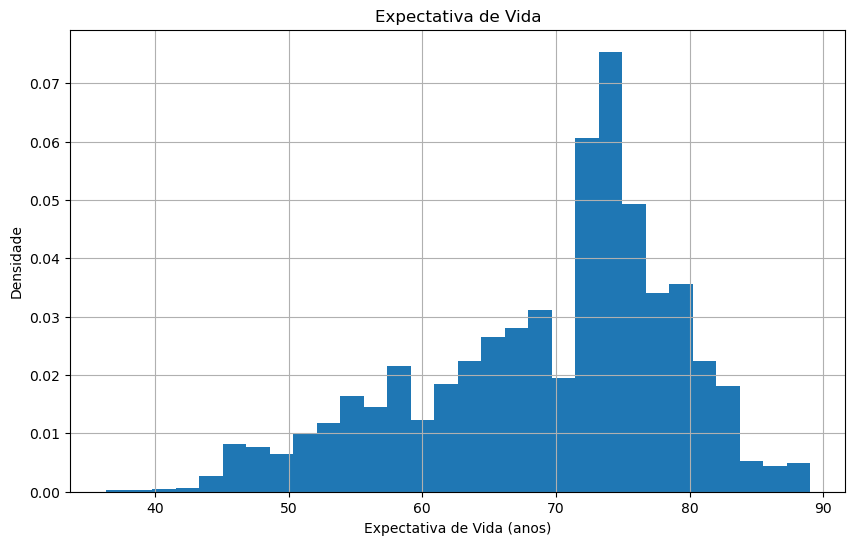

In [264]:
plt.figure(figsize=(10, 6))
plt.hist(df['Life_expectancy'], bins=30, density=True) #Usando a função density=True para normalizar o histograma
plt.title('Expectativa de Vida')
plt.xlabel('Expectativa de Vida (anos)')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()




In [265]:
# Calculando média e variância
media = df['Life_expectancy'].mean()
variancia = df['Life_expectancy'].var()

print(f'Média: {media:.2f} anos')
print(f'Variância: {variancia:.2f}')

Média: 69.46 anos
Variância: 92.92


### Questão 3

##### Mostre a série temporal da variável Life_Expectancy para os países: Ireland, Finland, Netherlands, Zambia, Angola. Os países com maior e menor expectativas de vida em 2014 são: 

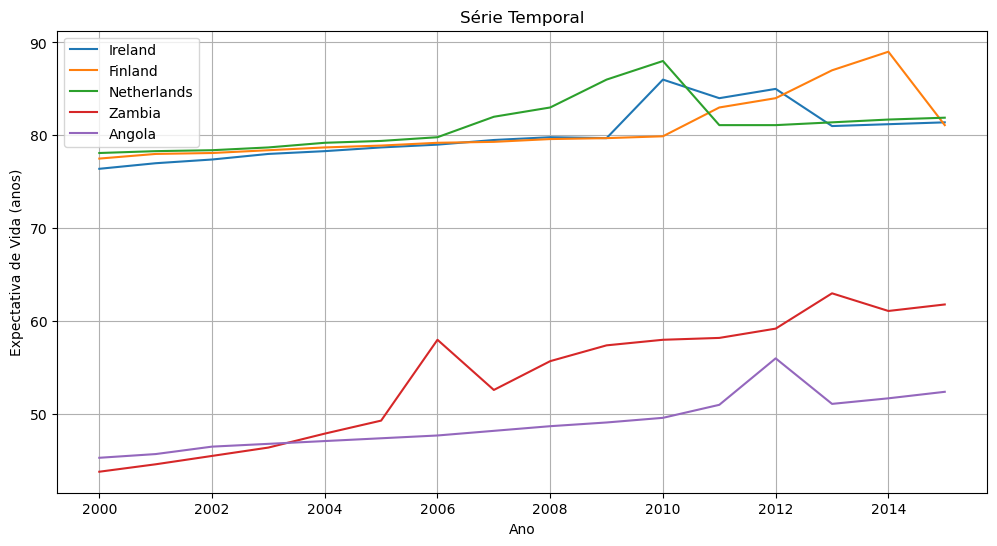

In [266]:
# Selecionando os países específicos
paises = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']

df_pa = pd.DataFrame()
for pais in paises:
    df_temp = df[df['Country'] == pais]
    df_pa = pd.concat([df_pa, df_temp])

# Plot
plt.figure(figsize=(12, 6))
for pais in paises:
    dados_pais = df_pa[df_pa['Country'] == pais]
    plt.plot(dados_pais['Year'], dados_pais['Life_expectancy'], label=pais)

plt.title('Série Temporal')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (anos)')
plt.legend()
plt.grid(True)
plt.show()

In [267]:
# Print dos países com menor e maior expectativa de vida
df2014 = df[df['Year'] == 2014]
pmaior = df2014.loc[df2014['Life_expectancy'].idxmax()]
pmenor = df2014.loc[df2014['Life_expectancy'].idxmin()]

pmaior_pais = pmaior['Country']
pmaior_expectativa = pmaior['Life_expectancy']
pmenor_pais = pmenor['Country']
pmenor_expectativa = pmenor['Life_expectancy']

print(f'País com maior expectativa de vida: {pmaior_pais} {pmaior_expectativa} anos')
print(f'País com menor expectativa de vida: {pmenor_pais} {pmenor_expectativa} anos')

País com maior expectativa de vida: Belgium 89.0 anos
País com menor expectativa de vida: Sierra Leone 48.1 anos


### Questão 4

##### Faça um boxplot para a variável Schooling. Considere os países: 'Ireland', 'Finland','Netherlands', 'Zambia', 'Angola'. Em termos da mediana, qual deles apresenta maior nível de escolaridade? 

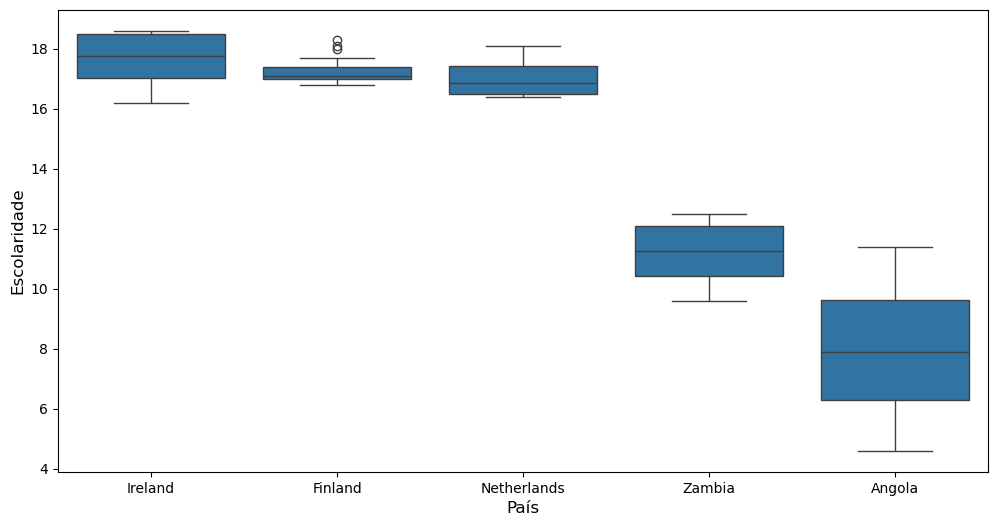

In [268]:
paises = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']

df_pa = pd.DataFrame()
for pais in paises:
    df_temp = df[df['Country'] == pais]
    df_pa = pd.concat([df_pa, df_temp])


plt.figure(figsize=(12, 6))
# mostra o boxplot
sns.boxplot(x="Country", y="Schooling", data=df_pa)
plt.xlabel('País', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show(True)

In [269]:
# Calcula a mediana de cada atributo
mediana = df_pa['Schooling'].median()

pmaior = df_pa.loc[df_pa['Schooling'].idxmax()]
pmaior_pais = pmaior['Country']

print(f'País com maior nível de escolaridade: {pmaior_pais}')
print(f'Mediana: {mediana:.2f}')


País com maior nível de escolaridade: Ireland
Mediana: 16.55


### Questão 5

##### Construa a matriz de correlação. Quais as variáveis menos correlacionadas?

In [270]:
import requests
from bs4 import BeautifulSoup

In [271]:
# Fonte para o web scraping https://brightdata.com/blog/web-data/how-to-scrape-html-tables


url = "https://www.worldometers.info/world-population/population-by-country/"
data = requests.get(url).text
soup = BeautifulSoup(data, 'lxml')


In [301]:
# Encontrando a tabela
table = soup.find('table', {'class': 'datatable w-full border border-zinc-200'})
# Collect the headers from the table
headers = []

# Locate the header row within the <thead> tag
header_row = table.find('thead').find_all('th')

for th in header_row:
    # Add header text to the headers list
    headers.append(th.text.strip())

# Initialize an empty list to store our data
data = []

# Loop through each row in the table (skipping the header row)
for tr in table.find_all('tr')[1:]:
    # Create a list of the current row's data
    row = []

# Find all data cells in the current row
    for td in tr.find_all('td'):
        # Get the text content of the cell and remove extra spaces
        cell_data = td.text.strip()

        # Add the cleaned cell data to the row list
        row.append(cell_data)

    # After getting all cells for this row, add the row to our data list
    data.append(row)

# Convert the collected data into a pandas DataFrame for easier handling
df = pd.DataFrame(data, columns=headers)

# Print the DataFrame to see the number of rows and columns
#print(df.shape)

#Dropar a primeira coluna
df = df.drop(columns=['Country (or dependency)'])

# Drop a primeira coluna que contém os índices
df = df.drop(columns=['#'])

#Converter todas as colunas para numéricas
for column in df.columns:
    df[column] = pd.to_numeric(df[column].str.replace(',', '').str.replace('%', ''), errors='coerce')

df


,Population 2025,Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1463865525,0.89,12929734.0,492,2973190,NaN,1.94,28.8,37.1,17.780000
1,1416096094,NaN,NaN,151,9388211,NaN,1.02,40.1,67.5,17.200000
2,347275807,0.54,1849236.0,38,9147420,1230663.0,1.62,38.5,82.8,4.220000
3,285721236,0.79,2233305.0,158,1811570,NaN,2.10,30.4,59.6,3.470000
4,255219554,1.57,3950390.0,331,770880,NaN,3.50,20.6,34.4,3.100000
...,...,...,...,...,...,...,...,...,...,...
228,4359,NaN,NaN,44,100,NaN,1.45,41.6,11.5,0.000053
229,3469,NaN,NaN,0,12170,NaN,1.70,42.8,68.0,0.000042
230,2608,4.07,102.0,261,10,53.0,2.57,27.3,NaN,0.000032
231,1821,0.11,2.0,7,260,3.0,2.46,35.7,44.5,0.000022


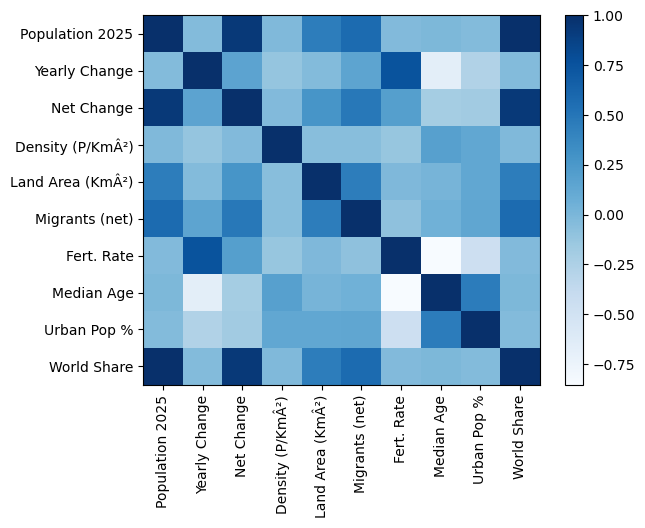

In [300]:
#Calculando da correlação

corr = df.corr()

plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.grid(False)
plt.show()



In [ ]:
for nome_coluna in corr.columns:    
    nome_linha = corr[nome_coluna].idxmin() #Procurando por index
    #print(f'Coluna: {nome_coluna}\nLinha: {nome_linha}\nValor: {corr[nome_coluna].min()}\n\n')
    
    #print(f'Coluna: {nome_coluna}\n Linha: {nome_linha} - Menor valor: {corr[nome_coluna].min()}\n')

    

# O menor valor de correlação
min_corr = corr.min().min()

min_corr_var = corr.stack().idxmin() # Procurando por Index

print(f'Menor valor de correlação: {min_corr} - Variáveis: {min_corr_var}')


Menor valor de correlação: -0.8547680896042663 - Variáveis: ('Fert. Rate', 'Median Age')
